In [ ]:
from voronoi.main import Voronoi
import import_ipynb
from delaunay import voronoi, delaunay, draw_voronoi
import numpy as np
from voronoi.utils import generate_uniform_points
import time
import os
import matplotlib.pyplot as plt

In [22]:
TEST_SPEC = [(-1, 1, 5), (-1, 1, 10), (-1, 1, 20), (-1, 1, 35), (-1, 1, 50), (-1, 1, 75), (-1, 1, 100),
             (-5, 5, 150), (-5, 5, 200), (-5, 5, 300), (-5, 5, 400), (-10, 10, 500), (-20, 20, 1000)]
# (-50, 50, 1500), (-50, 50, 2000), (-50, 50, 3000), (-50, 50, 3500), (-50, 50, 4000), (-50, 50, 4500), (-100, 100, 5000)]
test_folder = 'data'

In [23]:


def read_test_data(new=False):
    input_data = []
    folder = test_folder + '/in'
    if not os.path.exists(folder):
        os.makedirs(folder)
    for i, d in enumerate(TEST_SPEC):
        # if file of name test{i} exists, read it
        try:
            if new:
                raise Exception
            with open(f"{folder}/test{i}.txt", "r") as f:
                lines = f.readlines()
                # Get the number of points from the first line
                num_points = int(lines[0])
                points = np.array([tuple(map(float, line.split()))
                                  for line in lines[1:]])
                input_data.append(points)
        except:
            with open(f"{folder}/test{i}.txt", "w") as f:
                points = generate_uniform_points(*d)
                num_points = len(points)  # Get the number of points
                # Write the number of points at the start of the file
                f.write(f"{num_points}\n")
                f.write("\n".join([" ".join(map(str, p)) for p in points]))
                input_data.append(points)
    return input_data

In [24]:
def runTests(saveOutput=True, tested=['fortune', 'delaunay']):
    test_data = read_test_data()
    times = {}
    tests_n = 5
    tests_n = len(test_data)
    fortune = Voronoi()
    for method in tested:
        if not os.path.exists(f"{test_folder}/out/{method}"):
            os.makedirs(f"{test_folder}/out/{method}")
    for i in range(tests_n):
        points = test_data[i]
        for method in tested:
            print(f"Testing {method}, test #{i}, n={len(points)}...")
            start = time.time()
            if method == 'fortune':
                res = fortune.get_voronoi(points)
            elif method == 'delaunay':
                triang = delaunay(points)
                res = voronoi(triang, points)
            times[(i, method)] = time.time() - start
            # if method == 'delaunay':
            #     vis = draw_voronoi(triang, points)
            #     vis.show()
            print(f"Time elapsed: {times[(i, method)]}")
            if saveOutput:
                with open(f"{test_folder}/out/{method}/test{i}.txt", "w") as f:
                    f.write("\n".join([" ".join(map(str, p)) for p in res]))
    plt.figure(figsize=(10, 10))
    plt.plot([len(test_data[i]) for i in range(tests_n)], [
             times[(i, 'fortune')] for i in range(tests_n)], label='Fortune')
    plt.plot([len(test_data[i]) for i in range(tests_n)], [
             times[(i, 'delaunay')] for i in range(tests_n)], label='Delaunay')
    plt.legend()
    plt.show()
    return times

In [25]:
def saveTimes():
    times = runTests()
    with open(f"{test_folder}/times.txt", "w") as f:
        f.write("\n".join([f"{i} {method} {times[(i, method)]}" for i in range(
            len(TEST_SPEC)) for method in ['fortune', 'delaunay']]))

Testing fortune, test #0, n=5...
Time elapsed: 0.0656125545501709
Testing delaunay, test #0, n=5...
Time elapsed: 0.0028493404388427734
Testing fortune, test #1, n=10...


Time elapsed: 0.19530224800109863
Testing delaunay, test #1, n=10...
Time elapsed: 0.005112171173095703
Testing fortune, test #2, n=20...
Time elapsed: 0.499406099319458
Testing delaunay, test #2, n=20...
Time elapsed: 0.011967658996582031
Testing fortune, test #3, n=35...
Time elapsed: 1.2814710140228271
Testing delaunay, test #3, n=35...
Time elapsed: 0.028247833251953125
Testing fortune, test #4, n=50...
Time elapsed: 2.4002792835235596
Testing delaunay, test #4, n=50...
Time elapsed: 0.05168294906616211
Testing fortune, test #5, n=75...
Time elapsed: 3.664318323135376
Testing delaunay, test #5, n=75...
Time elapsed: 0.11391019821166992
Testing fortune, test #6, n=100...
Time elapsed: 6.48761773109436
Testing delaunay, test #6, n=100...
Time elapsed: 0.09137439727783203
Testing fortune, test #7, n=150...
Time elapsed: 10.51426076889038
Testing delaunay, test #7, n=150...
Time elapsed: 0.1320347785949707
Testing fortune, test #8, n=200...
Time elapsed: 17.66740846633911
Testing delau

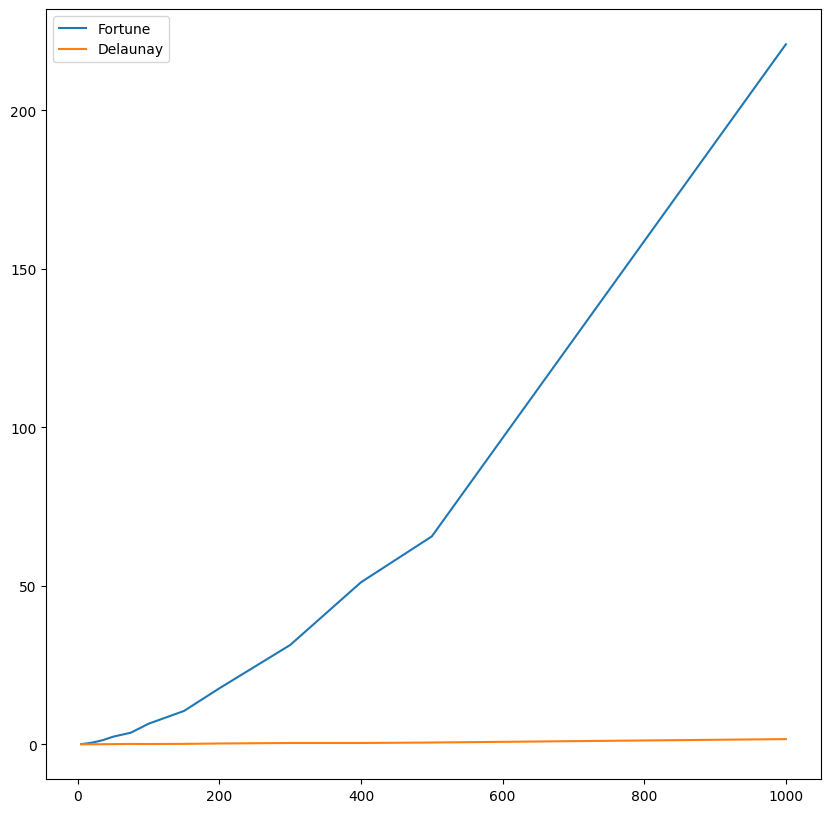

In [26]:
saveTimes()